# Reading SP Data

The Spectral Profiler data is available in archives with `.sl2` file endings.  These files are 

In [1]:
import os
import tarfile
import glob

import plio
import libpysat
import math

import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd
# from datasketch import MinHashLSH, WeightedMinHashGenerator
# %pylab inline

In [2]:
"# To get a dataframe of the data\n",
import os
files = glob.glob('*.spc')
d = {}
for f in files:
    s = libpysat.data.spectra.Spectra.from_file(f)
    ref1s = s.xs('REF1', level=1, axis=1)
    break

/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/libpysat-0.1.0-py3.6.egg/libpysat/data/io.py:21: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  geo_data = io_spectral_profiler.Spectral_Profiler(f)


In [3]:
# for row, column in ref1s.data.iterrows():
#     print (row)
ref1s.data

id,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
major,,,,,,,,,,,,,,,,,,,,,
512.6,0.0016,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0030,0.0000,0.0000,0.0015,0.0030,0.0076,0.0000,0.0045,0.0015
518.4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0017,0.0000,0.0,0.0034,...,0.0000,0.0050,0.0000,0.0000,0.0017,0.0050,0.0083,0.0000,0.0000,0.0000
524.7,0.0016,0.0016,0.0016,0.0000,0.0000,0.0000,0.0000,0.0016,0.0,0.0000,...,0.0000,0.0031,0.0000,0.0063,0.0000,0.0000,0.0000,0.0000,0.0016,0.0000
530.4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0016,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0015,0.0000,0.0000,0.0030,0.0076,0.0000,0.0000,0.0015
536.5,0.0000,0.0016,0.0000,0.0000,0.0000,0.0016,0.0000,0.0000,0.0,0.0015,...,0.0000,0.0015,0.0015,0.0030,0.0000,0.0000,0.0000,0.0015,0.0000,0.0000
542.8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
548.7,0.0000,0.0016,0.0016,0.0016,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0015,0.0000,0.0031,0.0000,0.0077,0.0000,0.0000,0.0015
554.5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
560.5,0.0016,0.0016,0.0032,0.0000,0.0016,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0016,0.0000,0.0000,0.0000,0.0016,0.0000,0.0016,0.0000,0.0016


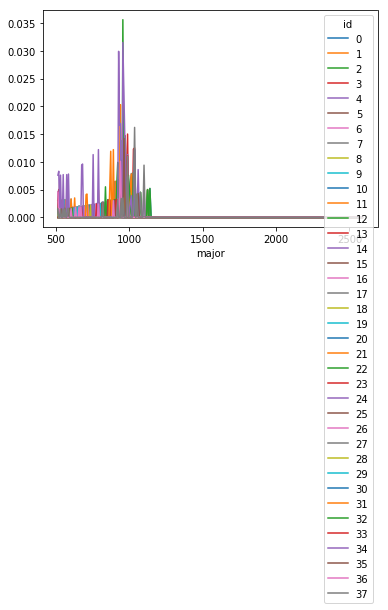

In [4]:
ref1s.data.plot()

SyntaxError: invalid syntax (<ipython-input-5-3937ffc96ba1>, line 1)

In [6]:
def DouglasPeucker(df, index_list, epsilon=0.000000000000000000000):
    dmax = 0
    index = 0
    end = len(index_list) - 1
    
    for i in range(1, end - 1):
        d = distance( (index_list[i], df.loc[index_list[i]]), (index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]]) ) 
        if ( d > dmax ):
            index = i
            dmax = d
            
    if ( dmax > epsilon ):
        recResults1 = DouglasPeucker(df, index_list[0:index], epsilon)
        recResults2 = DouglasPeucker(df, index_list[index:end + 1], epsilon)
        ResultList = recResults1 + recResults2
    else:
        ResultList = [(index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]])]
        print(ResultList, '         ', end)

    return ResultList
    '''
    Pseudo Code
    end = length(PointList)
    for i = 2 to ( end - 1) {
        d = perpendicularDistance(PointList[i], Line(PointList[1], PointList[end])) 
        if ( d > dmax ) {
            index = i
            dmax = d
        }
    }
    function DouglasPeucker(PointList[], epsilon)
    // Find the point with the maximum distance
    dmax = 0
    index = 0
    end = length(PointList)
    for i = 2 to ( end - 1) {
        d = perpendicularDistance(PointList[i], Line(PointList[1], PointList[end])) 
        if ( d > dmax ) {
            index = i
            dmax = d
        }
    }
    
    // If max distance is greater than epsilon, recursively simplify
    if ( dmax > epsilon ) {
        // Recursive call
        recResults1[] = DouglasPeucker(PointList[1...index], epsilon)
        recResults2[] = DouglasPeucker(PointList[index...end], epsilon)

        // Build the result list
        ResultList[] = {recResults1[1...length(recResults1)-1], recResults2[1...length(recResults2)]}
    } else {
        ResultList[] = {PointList[1], PointList[end]}
    }
    // Return the result
    return ResultList[]
end
    '''
def convert(df, index_list):
    returnVal = pd.DataFrame( columns = ['0'] )
    for pair in index_list:
        #         dictionary[pair[0]] = pair[1]
        returnVal.loc[pair[0]] = [pair[1]]
    return returnVal
    
def distance(point, start, end):
    numerator = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0]* start[1] - end[1]*start[0])
    #     print(numerator)
    denominator = math.sqrt( (end[1]-start[1])*(end[1]-start[1]) + (end[0] - start[0])*(end[0] - start[0]) )
    #     print(denominator)
    return numerator/denominator

In [7]:
test = DouglasPeucker(ref1s.data.iloc[:, 2], ref1s.data.index )

# print(test.loc[524.7])
# print(other_test.loc[524.7])
# print(distance((518.4, 0) ,(512.6, .0016) , (524.7, .0012) ))
newline = convert(ref1s.data.iloc[:, 2], test)
print(len(test))
print(newline)

[(512.6, 0.0), (518.4, 0.0)]           1
[(524.7, 0.0016), (524.7, 0.0016)]           0
[(530.4, 0.0), (554.5, 0.0)]           4
[(560.5, 0.0032), (560.5, 0.0032)]           0
[(566.7, 0.0), (566.7, 0.0)]           0
[(572.6, 0.0016), (572.6, 0.0016)]           0
[(578.5, 0.0), (596.7, 0.0)]           3
[(602.5, 0.0017000000000000001), (602.5, 0.0017000000000000001)]           0
[(608.6, 0.0), (830.8, 0.0)]           37
[(836.8, 0.0), (848.8, 0.0029000000000000002)]           2
[(854.6, 0.0032), (854.6, 0.0032)]           0
[(860.7, 0.0), (866.7, 0.0)]           1
[(872.7, 0.0031000000000000003), (872.7, 0.0031000000000000003)]           0
[(878.7, 0.0), (896.6, 0.0)]           3
[(902.7, 0.0033), (902.7, 0.0033)]           0
[(908.7, 0.0), (920.6, 0.0)]           2
[(926.6, 0.0034000000000000002), (932.6, 0.0034000000000000002)]           1
[(938.6, 0.0), (979.7, 0.0)]           6
[(987.6, 0.0038), (987.6, 0.0038)]           0
[(993.7, 0.0), (2587.9, 0.0)]           189
40
           

269


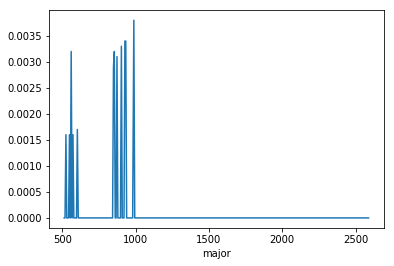

In [8]:
print(len(ref1s.data.index))
ref1s.data.iloc[:, 2].plot()

31
             0
512.6   0.0000
518.4   0.0000
524.7   0.0016
530.4   0.0000
554.5   0.0000
560.5   0.0032
566.7   0.0000
572.6   0.0016
578.5   0.0000
596.7   0.0000
602.5   0.0017
608.6   0.0000
830.8   0.0000
836.8   0.0000
848.8   0.0029
854.6   0.0032
860.7   0.0000
866.7   0.0000
872.7   0.0031
878.7   0.0000
896.6   0.0000
902.7   0.0033
908.7   0.0000
920.6   0.0000
926.6   0.0034
932.6   0.0034
938.6   0.0000
979.7   0.0000
987.6   0.0038
993.7   0.0000
2587.9  0.0000


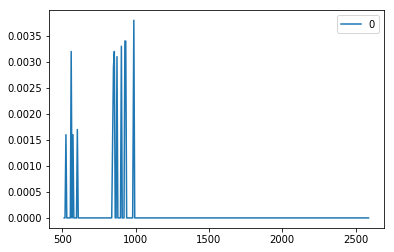

In [9]:
print(len(newline.index))
print(newline)
newline.plot()

## Data Extraction
Only the .spc file is truly needed here.  We want to keep a link to the underlying jpg, but those are simply the same file name with .jpg attched.  I also wonder how much value we have in keeping those around at all?  Something to decide in the future.

All of the data is currently stored locally in:  `/work/projects/jaxa02/SP_Level2C/02`

In [ ]:
files = glob.glob('*.sl2')
for f in files:
    tar = tarfile.open(f)
    # Extract the spc and the ctg files
    list(map(tar.extract, [m for m in tar.getmembers() if '.spc' in m.name]))
files = glob.glob('*.spc')

# If you want a csv/tsv file - this block cooks one - maybe good for loading into HBase
"""with open('data.tsv', 'w') as csv:
    for i, f in enumerate(files):
        s = libpysat.data.spectra.Spectra.from_file(f).T
        s['image_name'] = os.path.splitext(f)[0]
        header = True
        if i > 0:
            header = False
        s.to_csv(csv, mode='a', sep='\t', header=header)"""

## Extracting Continuum Corrected Spectra

In [ ]:
import os
files = glob.glob('*.spc')
d = {}
for f in files:
    s = libpysat.data.spectra.Spectra.from_file(f)
    ref1s = s.xs('REF1', level=1, axis=1)
    res, denom = ref1s.continuum_correct(nodes=[512.6, 1547.7, 2404.2],correction_nodes=[512.6, 1547.7, 2587.9], func=libpysat.transform.continuum.regression)
    d[s.loc['PRODUCT_ID'].iloc[0]] = res
    break
res

## Computing a Weighted MinHash

In [ ]:
mg = WeightedMinHashGenerator(269, sample_size=256)
def compute_minhash(col, mg,**kwargs):
    v = col.values
    m = mg.minhash(v)
    return m

hashes = merged.data.apply(compute_minhash, args=(mg,))
print(len(hashes))

## Creating the MinHashLSH index

In [ ]:
# Create weighted MinHash LSH index
lsh = MinHashLSH(threshold=0.98, num_perm=256, prepickle=False)
for i, j in enumerate(hashes[:1000]):
    lsh.insert("{}".format(i), j)
result = lsh.query(hashes[11])
print("Approximate neighbours with weighted Jaccard similarity > 0.98", result)

## Sizes - Can we do this in memory?
How large are the has tables for the 1164 observations that have been loaded?

In [ ]:
print(lsh.hashranges)
for ht in lsh.hashtables:
    k = list(ht.keys())[0]
    print(len(ht.keys()), sys.getsizeof(k))
sys.getsizeof(k)

Sanity check to see that the above identified neighbors are actually similar.

In [ ]:
figsize(12,12)
for i in result:
    merged.data.T.iloc[int(i)].plot(alpha=0.1)
merged.data.T.iloc[200].plot()

In [ ]:
from datasketch import WeightedMinHashLSH
# Create weighted MinHash LSH index
wlsh = WeightedMinHashLSH(threshold=0.965, num_perm=128, weights=(0.2, 0.8))
for i, j in enumerate(hashes):
    wlsh.insert("{}".format(i), j)
result = wlsh.query(hashes[11])
print("Approximate neighbours with weighted Jaccard similarity > 0.965", result)